### Agenda

1 - Novas perguntas do CEO

2 - Planejamento da solução

3 - Estrutura de dados

4 - Transformação de dados

### Novas perguntas do CEO

1 - Qual o número de imóveis por ano de construção?

2 - Qual o menor número de quartos por ano de construção de imóveis?

3 - Qual o preço de compra mais alto por cada número de quarto?

4 - Qual a soma de todos os preços de compra por número de quartos?

5 - Qual a soma de todos os preços de compra por número de quartos e banheiros?

6 - Qual o tamanho médio das salas dos imóveis por ano de construção?

7 - Qual o tamanho mediano das salas dos imóveis por ano de construção?

8 - Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

9 - Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

10 - Conseguir identificar (no mapa) as casas e o maior valor?

In [1]:
# Carregando os dados do estudo de caso em um jupyter notebook

## importar pandas

import pandas as pd

# importando o dataset usando o método pd.read_excel

df = pd.read_csv('kc_house_data.csv')

In [2]:
# Como suprimir a notação científica em Pandas
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [3]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [4]:
# Número de imóveis por número de quartos

df[df['bedrooms'] == 0].shape # essa é uma forma manual, mas impraticável em séries com muitos valores

(13, 21)

In [5]:
df[['id', 'bedrooms']].groupby('bedrooms') # agrupando por valores de bedroons. Agrupa colunas por valores de bedrooms

In [6]:
df[['id', 'bedrooms']].groupby('bedrooms').size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

Acima a melhor construção para responder perguntas do tipo "*quantos têm desse tipo?*"

Para mais informações de **groupby**, acesso documentação pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [7]:
df_grouped = df[['id', 'bedrooms']].groupby('bedrooms')

for bedrooms, frame in df_grouped:
    print(f'Numero de quartos: {bedrooms}')
    print(frame.shape, end = '\n\n')        # para ver o frame, basta substituir shape por head()

Numero de quartos: 0
(13, 2)

Numero de quartos: 1
(199, 2)

Numero de quartos: 2
(2760, 2)

Numero de quartos: 3
(9824, 2)

Numero de quartos: 4
(6882, 2)

Numero de quartos: 5
(1601, 2)

Numero de quartos: 6
(272, 2)

Numero de quartos: 7
(38, 2)

Numero de quartos: 8
(13, 2)

Numero de quartos: 9
(6, 2)

Numero de quartos: 10
(3, 2)

Numero de quartos: 11
(1, 2)

Numero de quartos: 33
(1, 2)



## Respondendo as perguntas do CEO

In [8]:
#1 - Qual o número de imóveis por ano de construção?

df[['id', 'yr_built']].groupby('yr_built').count().reset_index() # reset_index() para colar o cabeçalho no lugar (?)

,yr_built,id
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45
...,...,...
111,2011,130
112,2012,170
113,2013,201
114,2014,559


In [9]:
# 2 - Qual o menor número de quartos por ano de construção de imóveis?

df[['bedrooms', 'yr_built']].groupby('yr_built').min().reset_index()

,yr_built,bedrooms
0,1900,1
1,1901,2
2,1902,2
3,1903,1
4,1904,2
...,...,...
111,2011,1
112,2012,2
113,2013,2
114,2014,1


In [10]:
# 3 - Qual o preço de compra mais alto por cada número de quarto?

df[['price', 'bedrooms']].groupby('bedrooms').max().reset_index()

,bedrooms,price
0,0,1295650.00
1,1,1247000.00
2,2,3278000.00
3,3,3800000.00
4,4,4489000.00
5,5,7062500.00
6,6,7700000.00
7,7,3200000.00
8,8,3300000.00
9,9,1400000.00


In [11]:
# 4 - Qual a soma de todos os preços de compra por número de quartos?

df[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

,bedrooms,price
0,0,5323550.00
1,1,63210934.00
2,2,1107788602.00
3,3,4580263939.00
4,4,4372957028.00
5,5,1259346326.00
6,6,224541613.00
7,7,36145017.00
8,8,14366000.00
9,9,5363999.00


In [12]:
#5 - Qual a soma de todos os preços de compra por número de quartos e banheiros?

df[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum().reset_index()

,bedrooms,bathrooms,price
0,0,0.00,3642600.00
1,0,0.75,265000.00
2,0,1.00,228000.00
3,0,1.50,288000.00
4,0,2.50,899950.00
...,...,...,...
139,10,2.00,650000.00
140,10,3.00,660000.00
141,10,5.25,1148000.00
142,11,3.00,520000.00


In [13]:
#6 - Qual o tamanho médio das salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').mean().reset_index()

,yr_built,sqft_living
0,1900,1732.01
1,1901,1763.62
2,1902,1919.63
3,1903,1507.74
4,1904,1603.18
...,...,...
111,2011,2313.68
112,2012,2378.74
113,2013,2636.59
114,2014,2615.39


In [14]:
#7 - Qual o tamanho mediano das salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').median().reset_index()

,yr_built,sqft_living
0,1900,1540.00
1,1901,1610.00
2,1902,1600.00
3,1903,1505.00
4,1904,1280.00
...,...,...
111,2011,2270.00
112,2012,2237.50
113,2013,2580.00
114,2014,2650.00


In [15]:
# 8 - Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

df[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

,yr_built,sqft_living
0,1900,732.94
1,1901,668.23
2,1902,878.66
3,1903,469.72
4,1904,1076.87
...,...,...
111,2011,804.86
112,2012,771.43
113,2013,883.50
114,2014,893.81


In [16]:
# 9 - Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

# Crescimento médio de preços de compras dos imóveis por ano
# Primeiro gráfico - eixo X = anos; eixo Y = soma dos preços | gráfico de barras

df['year'] = pd.to_datetime(df['date']).dt.year

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,2014
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,2014
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,2015
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,2014
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,2015


In [17]:
df[['price', 'year']].groupby('year').sum().reset_index()

,year,price
0,2014,7889841842.00
1,2015,3783083166.00


In [18]:
from matplotlib import pyplot as plt

<BarContainer object of 2 artists>

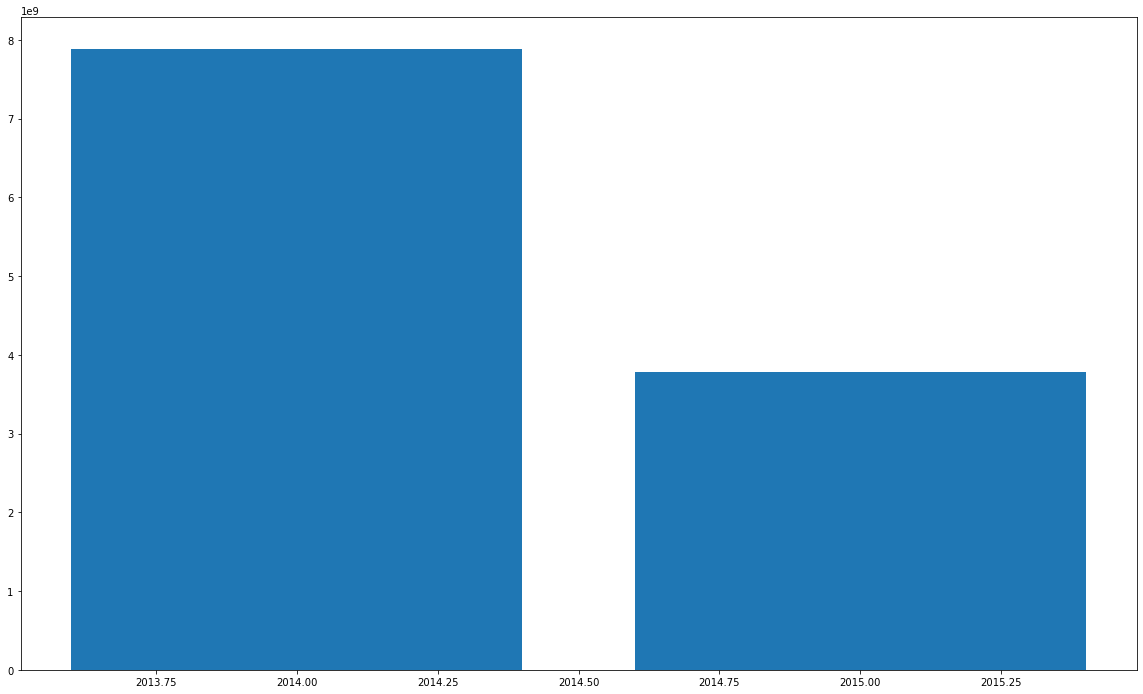

In [19]:
df['year'] = pd.to_datetime(df['date']).dt.year

by_year = df[['price', 'year']].groupby('year').sum().reset_index()


plt.figure(figsize=(20,12))
plt.bar(by_year['year'], by_year['price'])

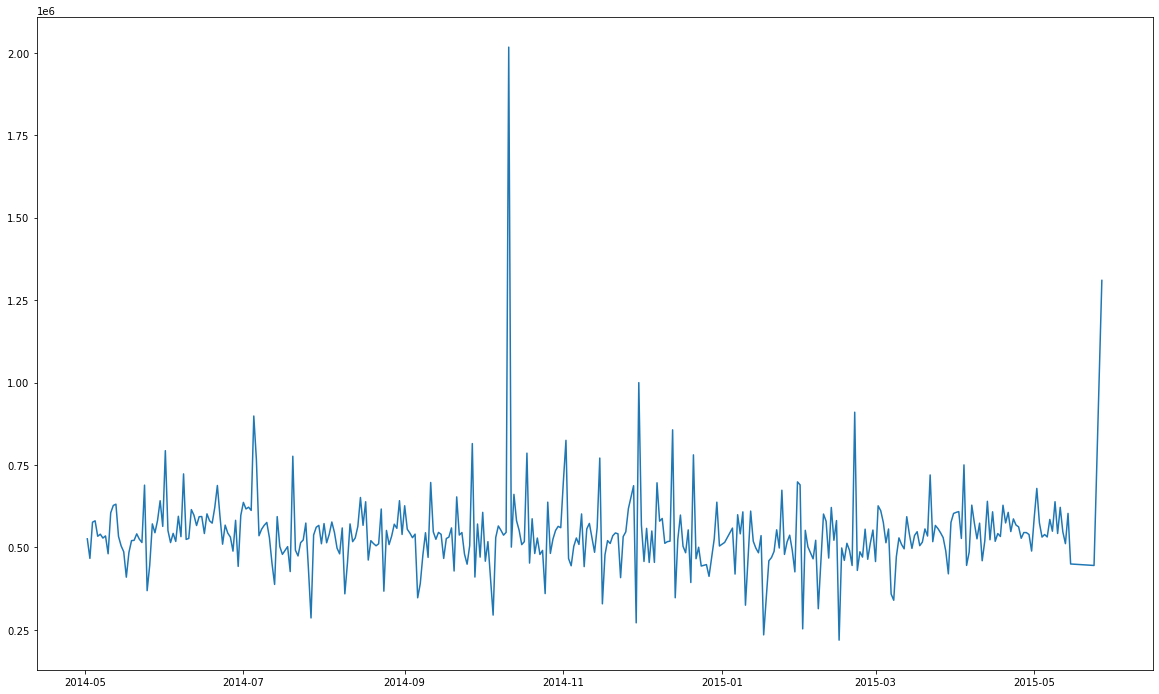

In [20]:
# Segundo gráfico

df['day'] = pd.to_datetime(df['date'])

by_day = df[['price', 'day']].groupby('day').mean().reset_index()


plt.figure(figsize=(20,12))
plt.plot(by_day['day'], by_day['price'])

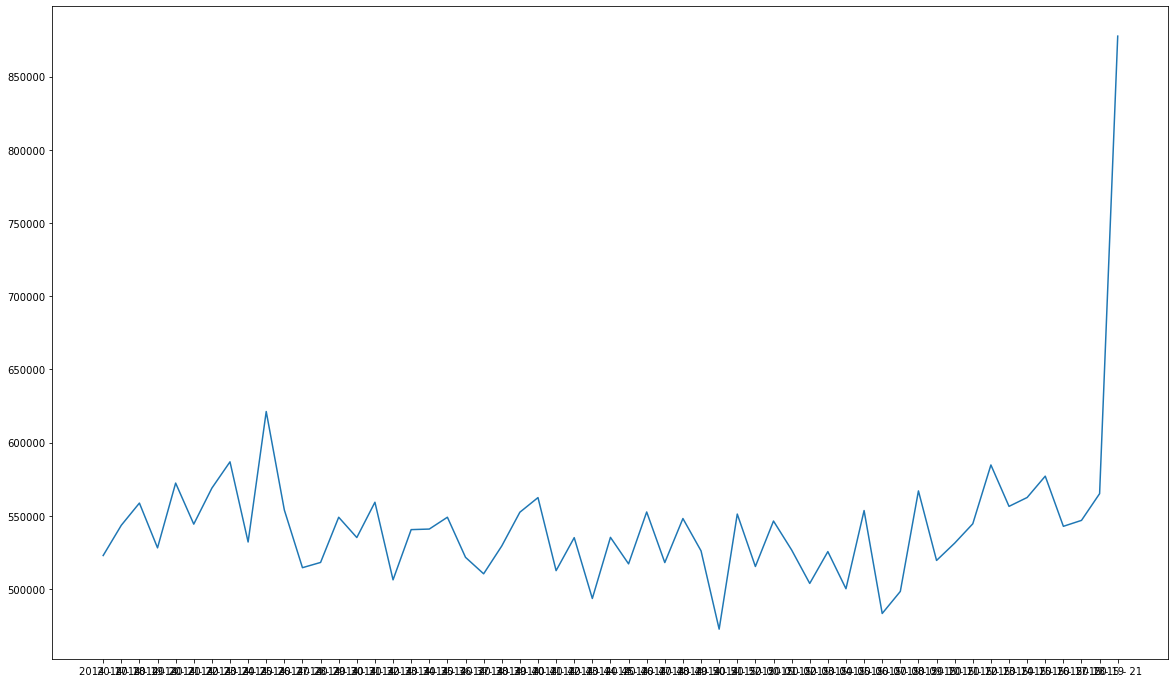

In [21]:
# Terceiro gráfico

df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y - %U' )

by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()


plt.figure(figsize=(20,12))
plt.plot(by_year_week['year_week'], by_year_week['price'])

In [25]:
#10 - Conseguir identificar (no mapa) as casas e o maior valor?

import plotly.express as px

houses = df[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox(houses, 
                        lat='lat', 
                        lon='long',
                        size='price',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})


fig.show()

## Novas perguntas do CEO

1. Crie uma nova coluna chamada: "dormitory_type"

2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

5. Faça um gráfico de linhas que mostre a evolução da média dos preços pelo ano da reforma dos imóveis a partir do ano de 1930.

6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

7. Crie um Dashboard com os gráficos das questões 02, 03, 04 (uma linha, duas colunas)

8. Crie um Dashboard com os gráficos das perguntas 02 e 04 (duas colunas)

9. Crie um Dashboard com os gráficos das perguntas 03 e 05 (duas linhas)

10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar